In [1]:
!pip install japanize-matplotlib

import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers


In [2]:
hand_name =["ぐー","ちょき","ぱー"]
judge_name =["あいこ","勝ち","負け"]

hand_data = [[0,0],[0,1],[0,2],
               [1,0],[1,1],[1,2],
               [2,0],[2,1],[2,2]]
judge_data     = [0,1,2,   2, 0, 1,   1,2,0]

In [3]:
x_train = x_test = np.array(hand_data)
y_train = y_test = np.array(judge_data)

print("学習データ （問題）: ")
print(x_train)
print(f"学習データ （答え）:　{y_train} ")

学習データ （問題）: 
[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]
 [2 0]
 [2 1]
 [2 2]]
学習データ （答え）:　[0 1 2 2 0 1 1 2 0] 


In [4]:
#
model = keras.models.Sequential()
model.add(layers.Dense(8, activation ="relu", input_dim=2))
model.add(layers.Dense(8, activation ="relu"))
model.add(layers.Dense(3, activation ="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


In [9]:
# L17をほぼそのまま (model.fitにおいてepochsの回数のみ500->1000に変更)
model.compile(optimizer="adam",                         #最適化アルゴリズム --> adamとは
              loss = "sparse_categorical_crossentropy",  #
              metrics = ["accuracy"]
              )
history = model.fit(x_train, y_train, epochs =1000,       # epochsの回数のみ500->1000に変更。少し複雑なデータになったので、回数を増やす
                    validation_data=(x_test, y_test))     # データが少ないから、validationも、同じデータでやっているのか。

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc: .2%}です")

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 1.0116 - accuracy: 0.4444 - val_loss: 1.0108 - val_accuracy: 0.4444
Epoch 2/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.0108 - accuracy: 0.4444 - val_loss: 1.0097 - val_accuracy: 0.4444
Epoch 3/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.0097 - accuracy: 0.4444 - val_loss: 1.0085 - val_accuracy: 0.4444
Epoch 4/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.0085 - accuracy: 0.4444 - val_loss: 1.0073 - val_accuracy: 0.4444
Epoch 5/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0073 - accuracy: 0.4444 - val_loss: 1.0062 - val_accuracy: 0.4444
Epoch 6/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0062 - accuracy: 0.4444 - val_loss: 1.0051 - val_accuracy: 0.4444
Epoch 7/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.0051 - accuracy: 0.4444 - val_loss: 1.0040 - val_accuracy: 0.4444
Epoch 8/1000
1/

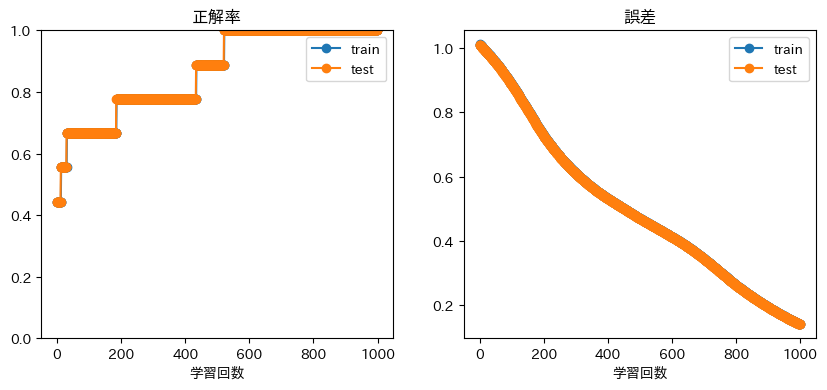

In [10]:
param = [["正解率" , "accuracy" , "val_accuracy"],
          ["誤差","loss" , "val_loss"]]

plt.figure(figsize=(10,4))
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.title(param[i][0])      #
  plt.plot(history.history[param[i][1]] , "o-")
  plt.plot(history.history[param[i][2]] , "o-")
  plt.xlabel("学習回数")
  plt.legend(["train","test"] , loc ="best")
  if i==0:
    plt.ylim([0,1])
plt.show()

In [13]:
# dataを渡して予測する
pre = model.predict(x_test)
pre
for i in range(3):
  print(f"{pre[i][0]: .0%} , {pre[i][1]: .0%} , {pre[i][2]: .0%}" )

1/1 [==============================] - 0s 36ms/step
 97% ,  1% ,  1%
 0% ,  78% ,  22%
 0% ,  18% ,  82%


In [18]:
for i in range(len(x_test)):
  hand1 = hand_name[x_test[i][0]]
  hand2 = hand_name[x_test[i][1]]
  index  = np.argmax(pre[i])
  judge = judge_name[index]
  print(f"私は{hand1}, 相手は {hand2} ---->{judge}")

私はぐー, 相手は ぐー ---->あいこ
私はぐー, 相手は ちょき ---->勝ち
私はぐー, 相手は ぱー ---->負け
私はちょき, 相手は ぐー ---->負け
私はちょき, 相手は ちょき ---->あいこ
私はちょき, 相手は ぱー ---->勝ち
私はぱー, 相手は ぐー ---->勝ち
私はぱー, 相手は ちょき ---->負け
私はぱー, 相手は ぱー ---->あいこ


In [15]:
hand_name

['ぐー', 'ちょき', 'ぱー']

In [16]:
x_test

array([[0, 0],
       [0, 1],
       [0, 2],
       [1, 0],
       [1, 1],
       [1, 2],
       [2, 0],
       [2, 1],
       [2, 2]])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 24        
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 3)                 27        
                                                                 
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.1358 - accuracy: 0.3333 - val_loss: 1.1334 - val_accuracy: 0.2222
Epoch 2/100
1/1 [==============================] - 0s 62ms/step - loss: 1.1334 - accuracy: 0.2222 - val_loss: 1.1311 - val_accuracy: 0.2222
Epoch 3/100
1/1 [=========================

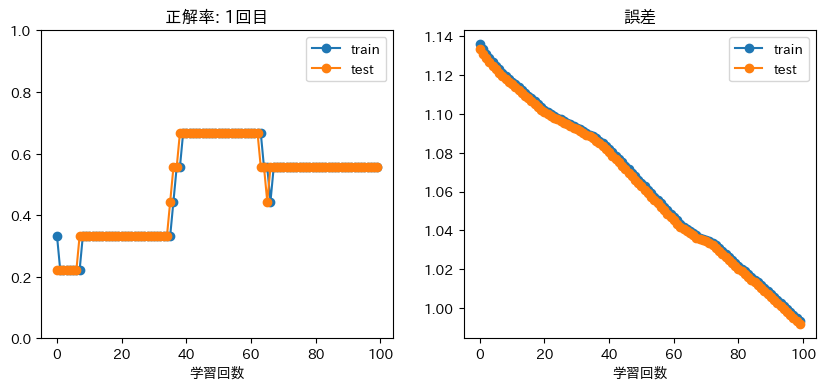

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 24        
                                                                 
 dense_13 (Dense)            (None, 8)                 72        
                                                                 
 dense_14 (Dense)            (None, 3)                 27        
                                                                 
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.0941 - accuracy: 0.4444 - val_loss: 1.0933 - val_accuracy: 0.3333
Epoch 2/100
1/1 [==============================] - 0s 55ms/step - loss: 1.0933 - accuracy: 0.3333 - val_loss: 1.0924 - val_accuracy: 0.3333
Epoch 3/100
1/1 [=========================

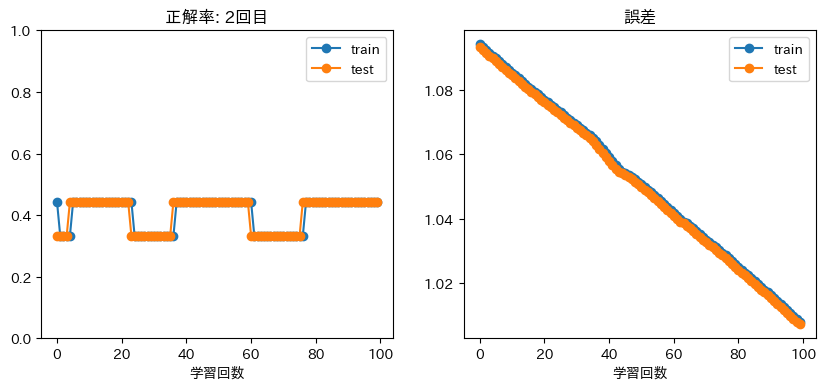

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 8)                 24        
                                                                 
 dense_16 (Dense)            (None, 8)                 72        
                                                                 
 dense_17 (Dense)            (None, 3)                 27        
                                                                 
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.1236 - accuracy: 0.4444 - val_loss: 1.1219 - val_accuracy: 0.3333
Epoch 2/100
1/1 [==============================] - 0s 48ms/step - loss: 1.1219 - accuracy: 0.3333 - val_loss: 1.1203 - val_accuracy: 0.3333
Epoch 3/100
1/1 [=========================

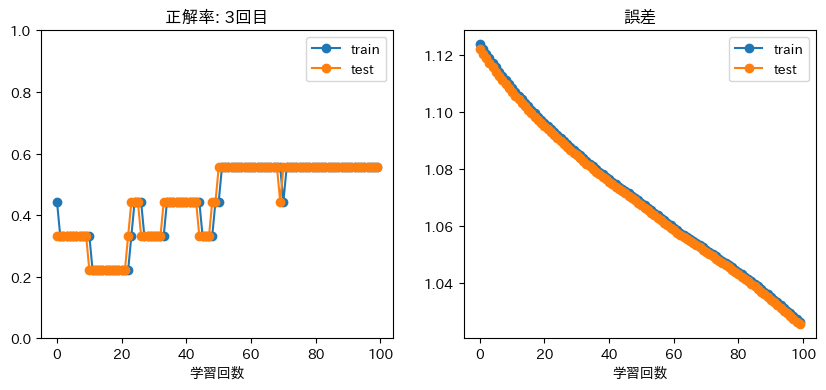

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 8)                 24        
                                                                 
 dense_19 (Dense)            (None, 8)                 72        
                                                                 
 dense_20 (Dense)            (None, 3)                 27        
                                                                 
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 1s 873ms/step - loss: 1.2752 - accuracy: 0.4444 - val_loss: 1.2672 - val_accuracy: 0.3333
Epoch 2/100
1/1 [==============================] - 0s 39ms/step - loss: 1.2672 - accuracy: 0.3333 - val_loss: 1.2609 - val_accuracy: 0.3333
Epoch 3/100
1/1 [======================

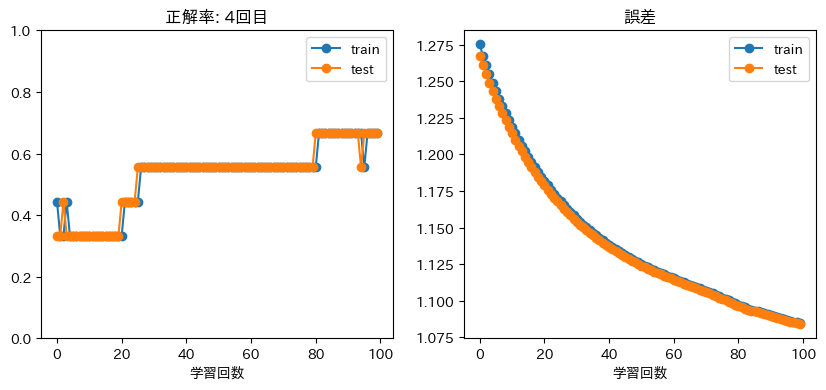

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 8)                 24        
                                                                 
 dense_22 (Dense)            (None, 8)                 72        
                                                                 
 dense_23 (Dense)            (None, 3)                 27        
                                                                 
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 1s 874ms/step - loss: 1.1258 - accuracy: 0.3333 - val_loss: 1.1243 - val_accuracy: 0.2222
Epoch 2/100
1/1 [==============================] - 0s 58ms/step - loss: 1.1243 - accuracy: 0.2222 - val_loss: 1.1227 - val_accuracy: 0.1111
Epoch 3/100
1/1 [======================

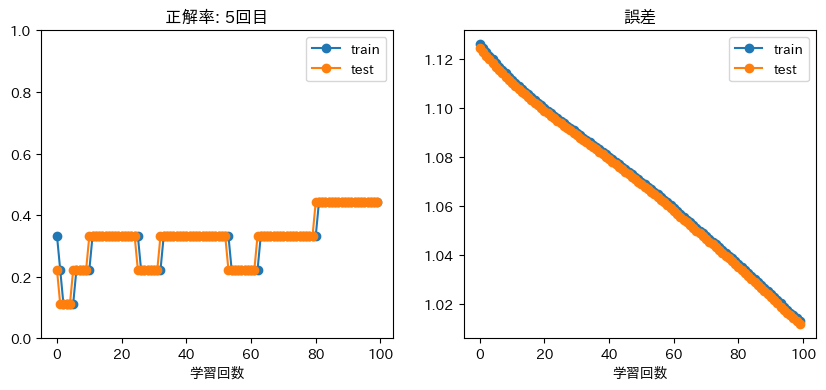

In [8]:
#同じことを5回繰り返したい。そして、その違いを見てみたい。

# すでにmodelはある。
number_of_trial =5
epochs = 100
for i in range(number_of_trial):
  model = keras.models.Sequential()
  model.add(layers.Dense(8, activation ="relu", input_dim=2))
  model.add(layers.Dense(8, activation ="relu"))
  model.add(layers.Dense(3, activation ="softmax"))
  model.summary()
  model.compile(optimizer="adam",                         #最適化アルゴリズム --> adamとは
                loss = "sparse_categorical_crossentropy",  #
                metrics = ["accuracy"]
                )
  history = model.fit(x_train, y_train, epochs =epochs,
                    validation_data=(x_test, y_test))     # データが少ないから、validationも、同じデータでやっているのか。

  test_loss, test_acc = model.evaluate(x_test, y_test)
  print(f"テストデータの正解率は{test_acc: .2%}です")


  param = [[f"正解率: {i+1}回目" , "accuracy" , "val_accuracy"],
          ["誤差","loss" , "val_loss"]]
  plt.figure(figsize=(10,4))
  for j in range(2):
    plt.subplot(1,2,j+1)
    plt.title(param[j][0])      #
    plt.plot(history.history[param[j][1]] , "o-")
    plt.plot(history.history[param[j][2]] , "o-")
    plt.xlabel("学習回数")
    plt.legend(["train","test"] , loc ="best")
    if j==0:
      plt.ylim([0,1])
  plt.show()







In [13]:
# ???  test_acc: .2%    --->?

SyntaxError: ignored